In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## a)

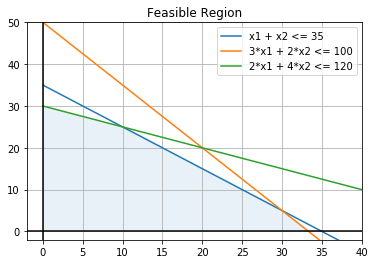

In [3]:
x = np.linspace(-0, 50, 100)
cons1 = (35 - x)
cons2 = (100 - 3*x)/2
cons3 = (120 - 2*x) / 4

plt.plot(x, cons1, label = 'x1 + x2 <= 35')
plt.plot(x, cons2, label = '3*x1 + 2*x2 <= 100')
plt.plot(x, cons3, label = '2*x1 + 4*x2 <= 120')
plt.fill_between(x, np.minimum(cons3, np.minimum(cons1, cons2)), 100*[0],
                 where = (np.minimum(cons1, cons2, cons3)>=0) & (x >= 0), alpha = .1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(xmin = -2, xmax = 40)
plt.ylim(ymin = -2, ymax = 50)
plt.grid() 
plt.legend()
plt.title('Feasible Region')


## b)
 
$x=[x_1, x_2, s_1, s_2, s_3]^T \\
c = [-2, -3, 0, 0, 0]^T \\
b=[35, 100, 120]^T \\
A = \begin{bmatrix}
    1       & 1 & 1 & 0 & 0 \\
    3       & 2 & 0 & 1 & 0 \\
    2      & 4 & 0 & 0 & 1
\end{bmatrix} \\
min\ c^Tx \\ 
s.t.\ Ax = b \\
\quad \ \ x >= 0 $  

## c)

In [45]:
A = np.array([[1, 1, 1, 0, 0],
            [3, 2, 0, 1, 0],
            [2, 4, 0, 0, 1]])
c = np.array([-2, -3, 0, 0, 0])
b = np.array([35, 100, 120])
x = np.zeros(5)

# initial
basic_set = [2, 3, 4]
nb = [0, 1]

basic_matrix = A[:, basic_set]
inv_B = np.linalg.inv(basic_matrix)
x_b = np.linalg.inv(basic_matrix).dot(b)
c_b = c[basic_set]
x[basic_set] = x_b
d = np.zeros(5)

num_iter = 0
solution_order = [[0, 0]]

while 1:
    print('Iteration:', num_iter + 1)
    print('Current cost is', x.dot(c))
    print('Basic:', basic_set)
    print('Basic vars: ', x[basic_set])
    print('Basic matrix:', basic_matrix)
    print('Inv basic matrix:', inv_B)
    print('Non-basic', nb)
    print('Non-basic vars', x[nb])
    
    
    
    # Add to basis
    to_add = -1
    for ind in nb:
        d_b = - (inv_B.dot(A[:, ind]))
        reduced_cost = c[ind] + c[basic_set].dot(d_b)
        print('Reduced cost for', ind, 'is', reduced_cost)
        # Since this is a small problem, sorting indices so taking first = Bland Rule
        if reduced_cost < 0:
            d[nb] = 0
            d[ind] = 1
            d[basic_set] = d_b
            to_add = ind
            print('Adding', to_add, 'as lowest ind with negative cost')
            print('Direction is', d)
            break
    else:
        print('Solution optimal - no negative costs - terminate')
        break
        
    if np.all(d_b >= 0):
        print('Infinite solution = all positive direction - terminate')
        break
    # Remove from basic, argmin takes the first as tiebreaker
    ratios = x / -d
    ratios[(d >= 0) | (x == 0)] = np.inf
    remove = np.argmin(ratios)
    
    step = ratios[remove]
    print('Removing', remove, 'and setting step to', step)
#     print(d)
#     print(x)
    x += step * d
#     print(x)
    
    basic_set = sorted([n for n in basic_set if n != remove] + [to_add])
    nb = sorted([n for n in nb if n != to_add] + [remove])
    x[nb] = 0
    x_b = x[basic_set]
    basic_matrix = A[:, basic_set]
    inv_B = np.linalg.inv(basic_matrix)
    c_b = c[basic_set]
    solution_order.append([x[0], x[1]])
    num_iter += 1
    print('')
    
            
    
    

Iteration: 1
Current cost is 0.0
Basic: [2, 3, 4]
Basic vars:  [  35.  100.  120.]
Basic matrix: [[1 0 0]
 [0 1 0]
 [0 0 1]]
Inv basic matrix: [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
Non-basic [0, 1]
Non-basic vars [ 0.  0.]
Reduced cost for 0 is -2.0
Adding 0 as lowest ind with negative cost
Direction is [ 1.  0. -1. -3. -2.]
Removing 3 and setting step to 33.3333333333

Iteration: 2
Current cost is -66.6666666667
Basic: [0, 2, 4]
Basic vars:  [ 33.33333333   1.66666667  53.33333333]
Basic matrix: [[1 1 0]
 [3 0 0]
 [2 0 1]]
Inv basic matrix: [[ 0.          0.33333333  0.        ]
 [ 1.         -0.33333333  0.        ]
 [ 0.         -0.66666667  1.        ]]
Non-basic [1, 3]
Non-basic vars [ 0.  0.]
Reduced cost for 1 is -1.66666666667
Adding 1 as lowest ind with negative cost
Direction is [-0.66666667  1.         -0.33333333  0.         -2.66666667]
Removing 2 and setting step to 5.0

Iteration: 3
Current cost is -75.0
Basic: [0, 1, 4]
Basic vars:  [ 30.   5.  40.]
Basic matrix

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


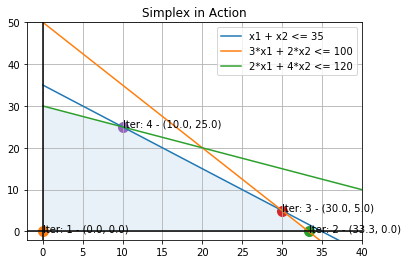

In [47]:
x = np.linspace(-0, 50, 100)
cons1 = (35 - x)
cons2 = (100 - 3*x)/2
cons3 = (120 - 2*x) / 4

plt.plot(x, cons1, label = 'x1 + x2 <= 35')
plt.plot(x, cons2, label = '3*x1 + 2*x2 <= 100')
plt.plot(x, cons3, label = '2*x1 + 4*x2 <= 120')
plt.fill_between(x, np.minimum(cons3, np.minimum(cons1, cons2)), 100*[0],
                 where = (np.minimum(cons1, cons2, cons3)>=0) & (x >= 0), alpha = .1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(xmin = -2, xmax = 40)
plt.ylim(ymin = -2, ymax = 50)
plt.grid()
plt.legend()
plt.title('Simplex in Action')

order = 1
for x, y in solution_order:
    plt.scatter([x], [y], s = 100)
    0, 
    order += 1